In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PlantVillage About Dataset
Human society needs to increase food production by an estimated 70% by 2050 to feed an expected population size that is predicted to be over 9 billion people. Currently, infectious diseases reduce the potential yield by an average of 40% with many farmers in the developing world experiencing yield losses as high as 100%. The widespread distribution of smartphones among crop growers around the world with an expected 5 billion smartphones by 2020 offers the potential of turning the smartphone into a valuable tool for diverse communities growing food. One potential application is the development of mobile disease diagnostics through machine learning and crowdsourcing. Here we announce the release of over 50,000 expertly curated images on healthy and infected leaves of crops plants through the existing online platform PlantVillage. We describe both the data and the platform. These data are the beginning of an on-going, crowdsourcing effort to enable computer vision approaches to help solve the problem of yield losses in crop plants due to infectious diseases.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from keras import models,layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
T_Color=ImageDataGenerator(
rescale=1./255,
horizontal_flip=True,
rotation_range=20,
zoom_range=0.2,
shear_range=0.2,
vertical_flip=True
)
Train_color=T_Color.flow_from_directory(
"/kaggle/input/plantvillage-dataset/color",
    target_size=(224,224),
batch_size=32,
class_mode="sparse")

Found 54305 images belonging to 38 classes.


In [79]:
Vaild = ImageDataGenerator(rescale = 1/255 )

# تحميل بيانات التدريب من المجلد
vaild_color = Vaild.flow_from_directory(
    "/kaggle/input/plantvillage-dataset/color",       # خطوة 4
    target_size=(224, 224),     # خطوة 5
    batch_size=32,              # خطوة 6
    class_mode= 'sparse')      # خطوة 7

Found 54305 images belonging to 38 classes.


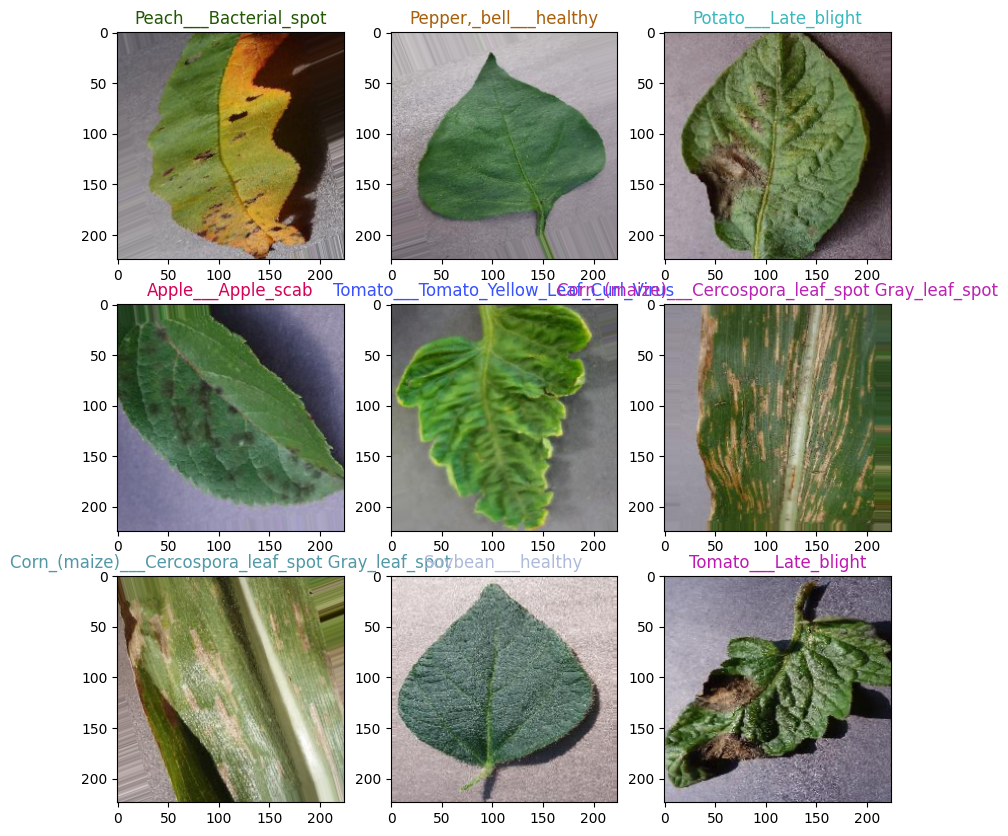

In [80]:
# استخراج الفئات
gen_dict = Train_color.class_indices
classes = list(gen_dict.keys())

# جلب الصور والتسميات من المولد
images, labels = next(Train_color)

# ضبط حجم الصور (بما أن target_size=(244,244))
image_height, image_width = 224, 224

# إعداد نافذة الرسم
plt.figure(figsize=(10, 10))

# عرض 9 صور عشوائية
random_indices = np.random.choice(len(images), 9, replace=False)  # اختيار 9 صور عشوائية

for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    
    # اختيار الصورة وحجمها
    image = images[idx]  # الصورة تأتي بالفعل بحجم 244x244x3
    
    # عرض الصورة
    plt.imshow(image)
    
    # اختيار الفئة (لا حاجة لـ np.argmax لأن labels أرقام صحيحة)
    class_name = classes[int(labels[idx])]
    
    # تعيين لون عشوائي للعنوان
    random_color = np.random.rand(3,)  # اختيار لون عشوائي (RGB)
    
    # تعيين العنوان للفئة
    plt.title(class_name, color=random_color, fontsize=12)
    
# عرض الرسم
plt.show()


In [81]:
train_image, train_label = next(Train_color)
print(train_image.shape)  # Should be (batch_size, height, width, channels)
print(train_label.shape)  # Should be (batch_size,)

(32, 224, 224, 3)
(32,)


 # **Convolutional Neural Network (NASNetMobile)**

In [82]:
from tensorflow.keras.applications import NASNetMobile 
Plant_color=NASNetMobile (weights="imagenet",include_top=False,input_shape=(224,224,3))
x=GlobalAveragePooling2D()(Plant_color.output)
x=Dense(128,activation="relu")(x)
output_layer=Dense(38,activation="softmax")(x)

In [83]:
model=Model(inputs=Plant_color.input,outputs=output_layer)

In [84]:
for layer in Plant_color.layers:
    layer.trainable=False

In [85]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        128 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_564      │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │        352 │ activation_564[0… │
│ (Conv2D)            │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │         44 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_565      │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_567      │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_565[0… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_567[0… │
│ (ZeroPadding2D)     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │        396 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      1,920 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_566      │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_568      │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │        396 │ activation_566[0

 Total params: 4,409,914 (16.82 MB)

 Trainable params: 140,198 (547.65 KB)

 Non-trainable params: 4,269,716 (16.29 MB)

In [86]:
# تجميع النموذج
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [91]:
batch_size = 32

In [92]:
# Training the Model
history = model.fit(
    Train_color,
    steps_per_epoch=Train_color.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=vaild_color,
    validation_steps=vaild_color.samples // batch_size ) # Validation steps

Epoch 1/5
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 802s 455ms/step - accuracy: 0.7050 - loss: 1.0765 - val_accuracy: 0.8771 - val_loss: 0.3769
Epoch 2/5
   1/1697 ━━━━━━━━━━━━━━━━━━━━ 1:20 48ms/step - accuracy: 0.8125 - loss: 0.5136

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1697/1697 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8125 - loss: 0.5136 - val_accuracy: 1.0000 - val_loss: 0.2912
Epoch 3/5
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 713s 419ms/step - accuracy: 0.8750 - loss: 0.3842 - val_accuracy: 0.8836 - val_loss: 0.3520
Epoch 4/5
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.9375 - loss: 0.3767 - val_accuracy: 1.0000 - val_loss: 5.5073e-05
Epoch 5/5
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 722s 424ms/step - accuracy: 0.8924 - loss: 0.3217 - val_accuracy: 0.8887 - val_loss: 0.3293


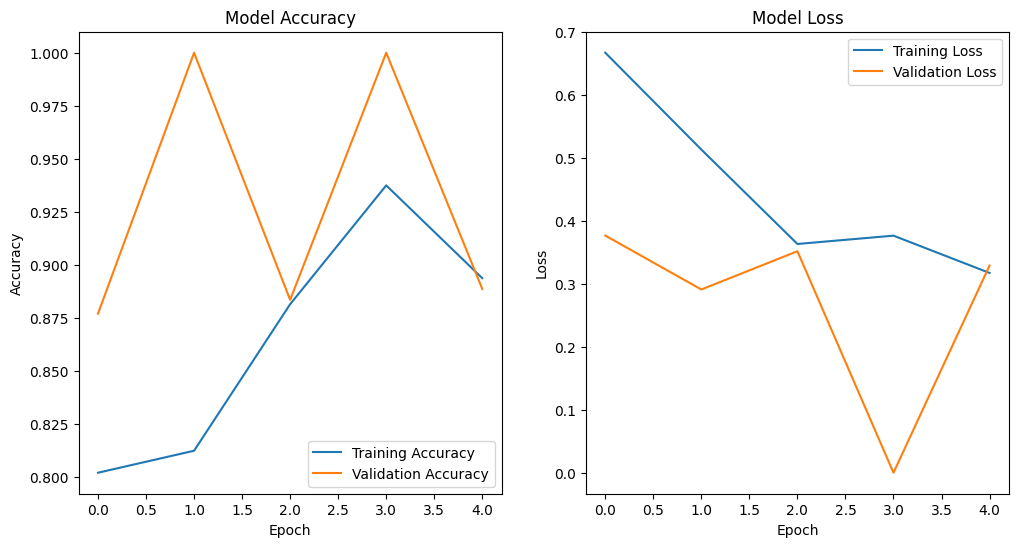

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# رسم دقة التدريب والتحقق
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# رسم خسارة التدريب والتحقق
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [95]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(vaild_color, steps=vaild_color.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 107s 63ms/step - accuracy: 0.8887 - loss: 0.3305
Validation Accuracy: 88.87%


In [96]:
# الحصول على فئات التدريب من مولد البيانات
gen_dict = Train_color.class_indices  # هذا هو القاموس الذي يربط أسماء الفئات بالأرقام

# تحويل القاموس إلى قائمة من أسماء الفئات
class_names = list(gen_dict.keys())  # الحصول على أسماء الفئات

print(class_names)  # طباعة أسماء الفئات

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [97]:
model.save('Plant_model.h5')